# Class : DSC540-T301 Data Preparation (2237-1)
### Name : Rajib Samanta
### Assignment : Project Milestone 4
### Assignment: Connecting to an API/Pulling in the Data and Cleaning/Formatting
### Project: Data Exploration on Marijuana Arrests(D.C)
### Name: Rajib Samanta
#### Overview
     According to the ACLU’s original analysis, marijuana arrests now account for over half of all drug arrests in the United States. Of the 8.2 million␣marijuana arrests between 2001 and 2010,88% were for simply having marijuana. Nationwide, the arrest data revealed one consistent trend: significant racial bias.Despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana.The laws related to the recreational use and possession of marijuana have changed at two milestones: the effective dates of the Marijuana Possession Decriminalization Amendment Act of 2014 on July 17, 2014, and of Initiative 71 on February 26, 2015 (https://mpdc.dc.gov/marijuana).
     
#### Data Sources
* -----------------
     API : Marijuana Arrests API query
#### Description: 
    This data includes arrests made by the Metropolitan Police Department (MPD). The data represents individuals arrested with a marijuana␣charge, regardless of whether there was a more serious secondary charge.
#### The API Link of data:
    https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/39/query?where=1%3D1&outFields=*&outSR=4326&f=json

In [179]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def fetch_json_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch JSON data. Status Code: {response.status_code}")
        return None

if __name__ == "__main__":
    api_url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/39/query?where=1%3D1&outFields=*&outSR=4326&f=json"
    json_data = fetch_json_data(api_url)

    if json_data:
        # Print the JSON data
        #print(json_data
        # Convert JSON data to DataFrame
        features = json_data['features']
        data = [feature['attributes'] for feature in features]
        # Convert the extracted data to DataFrame
        df = pd.DataFrame(data)
        # Set display options to show all columns
        pd.set_option('display.max_columns', None)

        # Display the DataFrame in table structure
        print(df.head())  # Display the first few rows of the DataFrame
    else:
        print("Failed to fetch JSON data.")

                                   TYPE ADULT_JUVENILE  YEAR       DATETIME  \
0  Possession with intent to distribute          Adult  2012  1326236400000   
1  Possession with intent to distribute          Adult  2012  1326242700000   
2  Possession with intent to distribute          Adult  2012  1326246900000   
3                            Possession          Adult  2012  1326249000000   
4                            Possession          Adult  2012  1326250200000   

                               CCN AGE OFFENSE_DISTRICT OFFENSE_PSA  \
0  b'\xea\x1d\xdf\xb3\xce\xc7\xcb'  21               6D         603   
1              b'\xa7+\x1ews\xb6M'  18               6D         602   
2          b'o\xc6\x0c\xd3Y\t\xe8'  28               6D         602   
3        b'\xf1t\xdd\xfe\x80\x01w'  56               7D         705   
4           b'\x8fR\xd8\xc0K\x1aO'  30               5D         502   

   OFFENSE_BLOCKX  OFFENSE_BLOCKY DEFENDANT_PSA DEFENDANT_DISTRICT RACE  \
0        403800.0      

In [180]:
# List all columns
print("Columns:")
print(df.columns.tolist())

Columns:
['TYPE', 'ADULT_JUVENILE', 'YEAR', 'DATETIME', 'CCN', 'AGE', 'OFFENSE_DISTRICT', 'OFFENSE_PSA', 'OFFENSE_BLOCKX', 'OFFENSE_BLOCKY', 'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX', 'CATEGORY', 'DESCRIPTION', 'ADDRESS', 'ARREST_BLOCKX', 'ARREST_BLOCKY', 'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'GLOBALID']


In [181]:
df.shape
# No of rows : 1000 and Number of columns : 27

(1000, 27)

In [182]:
# Get information about the DataFrame
data_info = df.info()
# Print the DataFrame info
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TYPE                1000 non-null   object 
 1   ADULT_JUVENILE      1000 non-null   object 
 2   YEAR                1000 non-null   int64  
 3   DATETIME            1000 non-null   int64  
 4   CCN                 947 non-null    object 
 5   AGE                 947 non-null    object 
 6   OFFENSE_DISTRICT    1000 non-null   object 
 7   OFFENSE_PSA         999 non-null    object 
 8   OFFENSE_BLOCKX      936 non-null    float64
 9   OFFENSE_BLOCKY      936 non-null    float64
 10  DEFENDANT_PSA       923 non-null    object 
 11  DEFENDANT_DISTRICT  924 non-null    object 
 12  RACE                947 non-null    object 
 13  ETHNICITY           947 non-null    object 
 14  SEX                 947 non-null    object 
 15  CATEGORY            1000 non-null   object 
 16  DESCRIP

#### About Dataset
 
 * TYPE :  Indicates the type of arrest
 
 * ADULT_JUVENILE : Specifies whether the arrestee is an adult or a juvenile Text
    
 *  YEAR : The year in which the arrest occurred Numeric
 
 *  DATETIME : The date and time of the arrest Text
 
 * CCN : Hash number that allows individuals to determine whether there are multiple arrests associated with one event Text
 
 * AGE : The age of the arrestee at the time of the arrest Numeric
    
 * OFFENSE_DISTRICT : The district where the offense took place Text
    
 * OFFENSE_PSA : The Police Service Area (PSA) associated with the offense Text
    
 * OFFENSE_BLOCKX : X-coordinate of the approximate block location of the offense Numeric
    
 * OFFENSE_BLOCKY : Y-coordinate of the approximate block location of the offense Numeric
    
 * DEFENDANT_PSA : The PSA associated with the defendant Text
    
 * DEFENDANT_DISTRICT : The district associated with the defendant Text
    
 * RACE : The race of the defendant, based on officer observation Text
    
 * ETHNICITY : The ethnicity of the defendant, based on officer observation Text
    
 * SEX : The gender of the defendant Text
    
 * CATEGORY : The category of the offense (e.g., possession, distribution,public consumption) Text
    
 * DESCRIPTION : A description of the offense Text
    
 * ADDRESS : The address of the offense location Text
    
 * ARREST_BLOCKX : X-coordinate of the approximate block location of the arrest Numeric
    
 * ARREST_BLOCKY : Y-coordinate of the approximate block location of the arrest Numeric
    
 * GIS_ID : Geographic Information System (GIS) ID associated with the record Text


In [183]:
# Change Header
df = df.rename(columns={'OFFENSE_BLOCKX': 'OFFENSE_X-COORDINATE'})
df = df.rename(columns={'OFFENSE_BLOCKY': 'OFFENSE_Y-COORDINATE'})
df = df.rename(columns={'ARREST_BLOCKX': 'ARREST_X-COORDINATE'})
df = df.rename(columns={'ARREST_BLOCKY': 'ARREST_Y-COORDINATE'})

In [184]:
# Format data into a more readable format
# Convert the column to datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df['CREATED'] = pd.to_datetime(df['CREATED'])
df['EDITED'] = pd.to_datetime(df['EDITED'])
# Reformat the datetime values
df['DATETIME'] = df['DATETIME'].dt.strftime('%Y/%m/%d %H:%M:%S')
df['CREATED'] = df['CREATED'].dt.strftime('%Y/%m/%d %H:%M:%S')
df['EDITED'] = df['EDITED'].dt.strftime('%Y/%m/%d %H:%M:%S')
# Example: Convert 'column_name' to float
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
# Make the 'DESCRIPTION' column all uppercase
df['DESCRIPTION'] = df['DESCRIPTION'].str.upper()
df.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_X-COORDINATE,OFFENSE_Y-COORDINATE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ADDRESS,ARREST_X-COORDINATE,ARREST_Y-COORDINATE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,b'\xea\x1d\xdf\xb3\xce\xc7\xcb',21.0,6D,603,403800.0,135500.0,708,7D,B,U,M,Narcotics,UCSA PWID MARIJUANA,2400 BLOCK OF ELVANS RD SE,401200.0,131700.0,MARIJUANA_ARRESTS_94,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12574,{F9FF1E97-DDA1-4FB2-8F17-7D9FDEB7E5A0}
1,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,b'\xa7+\x1ews\xb6M',18.0,6D,602,405900.0,137900.0,602,6D,B,N,M,Narcotics,UCSA PWID MARIJUANA,4900 BLOCK OF QUARLES ST NE,405900.0,137900.0,MARIJUANA_ARRESTS_95,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12575,{AE3E56E7-1B41-4B89-B890-B76D6FECDCB6}
2,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,b'o\xc6\x0c\xd3Y\t\xe8',28.0,6D,602,405900.0,136900.0,None,None,W,N,M,Narcotics,UCSA PWID MARIJUANA,800 BLOCK OF 49TH ST NE,405900.0,136900.0,MARIJUANA_ARRESTS_96,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12576,{0B396388-76AA-4450-858F-FD34D6460F61}
3,Possession,Adult,2012,1970/01/01 00:22:06,b'\xf1t\xdd\xfe\x80\x01w',56.0,7D,705,400700.0,130700.0,101,1D,B,N,F,Narcotics,UCSA POSSESSION MARIJUANA,10TH / ALABAMA AVE SE,NaN,NaN,MARIJUANA_ARRESTS_97,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12577,{2D28FE03-9694-4A89-8483-8FB433DDA17A}
4,Possession,Adult,2012,1970/01/01 00:22:06,b'\x8fR\xd8\xc0K\x1aO',30.0,5D,502,400400.0,139800.0,504,5D,B,U,M,Narcotics,UCSA POSSESSION MARIJUANA,2800 BLOCK OF 7TH ST NE,NaN,NaN,MARIJUANA_ARRESTS_98,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12578,{46AD91A9-1360-4FCB-A32F-267E9EE31A40}


In [185]:
# Find the missing values of columns
df.isnull().sum() # Sum of null value for each columns
## From the below table we can see AGE is missing for 53 records,CCN,RACE,ETHNICITY & SEX is missing for 53 records
## We can remove these 53 records a insufficient records or bad data.

TYPE                      0
ADULT_JUVENILE            0
YEAR                      0
DATETIME                  0
CCN                      53
AGE                      53
OFFENSE_DISTRICT          0
OFFENSE_PSA               1
OFFENSE_X-COORDINATE     64
OFFENSE_Y-COORDINATE     64
DEFENDANT_PSA            77
DEFENDANT_DISTRICT       76
RACE                     53
ETHNICITY                53
SEX                      53
CATEGORY                  0
DESCRIPTION               0
ADDRESS                  54
ARREST_X-COORDINATE     219
ARREST_Y-COORDINATE     219
GIS_ID                    0
CREATOR                   0
CREATED                   0
EDITOR                    0
EDITED                    0
OBJECTID                  0
GLOBALID                  0
dtype: int64

In [186]:
# Remove rows with null values in column AGE, CCN,RACE,ETHNICITY & SEX
df = df.dropna(subset=['AGE'])
df.shape
## After removing  53 row nor count is 947, earlier was 1000

(947, 27)

In [187]:
# Filter rows where DESCRIPTION contains 'Marijuana'
df = df[df['DESCRIPTION'].str.contains('MARIJUANA', case=False, na=False)]
df.shape
##--> looks like remaining data set is for MARIJUANA arrest related

(947, 27)

In [188]:
# Get information about the DataFrame
data_info = df.info()
# Print the DataFrame info
print(data_info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TYPE                  947 non-null    object 
 1   ADULT_JUVENILE        947 non-null    object 
 2   YEAR                  947 non-null    int64  
 3   DATETIME              947 non-null    object 
 4   CCN                   947 non-null    object 
 5   AGE                   947 non-null    float64
 6   OFFENSE_DISTRICT      947 non-null    object 
 7   OFFENSE_PSA           947 non-null    object 
 8   OFFENSE_X-COORDINATE  936 non-null    float64
 9   OFFENSE_Y-COORDINATE  936 non-null    float64
 10  DEFENDANT_PSA         871 non-null    object 
 11  DEFENDANT_DISTRICT    872 non-null    object 
 12  RACE                  947 non-null    object 
 13  ETHNICITY             947 non-null    object 
 14  SEX                   947 non-null    object 
 15  CATEGORY              9

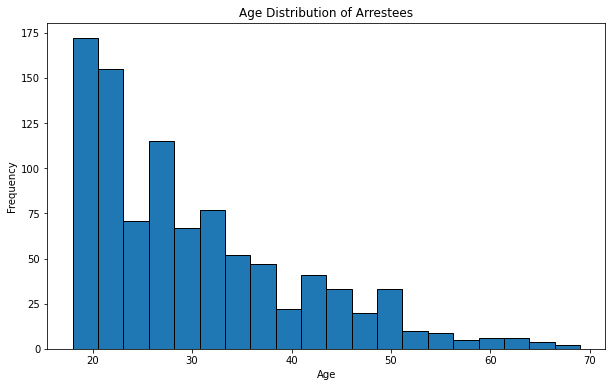

In [189]:
# Identify outliers
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'],edgecolor='black', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Arrestees')
plt.show()

* From the above plot we can say that below 10 years and above 65 years datas are outlier

In [194]:

# Now remove the outlier
df = df[(df['AGE'] <= 65) & (df['AGE'] >= 10)] # using operator
df.shape
## Removed 2 outlier rows

(945, 27)

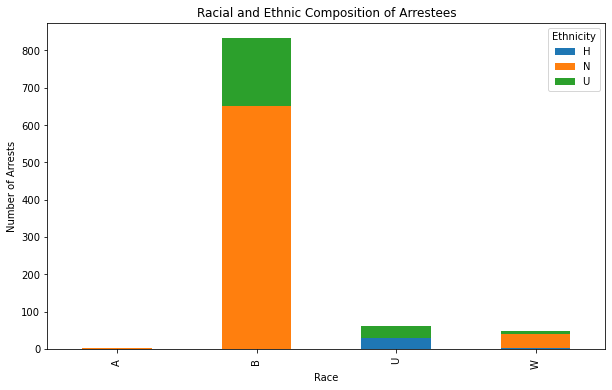

In [195]:
# Racial and Ethnic Composition of Arrestees
arrests_by_demographics = df.groupby(['RACE', 'ETHNICITY']).size().unstack()
arrests_by_demographics.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.title('Racial and Ethnic Composition of Arrestees')
plt.legend(title='Ethnicity')
plt.show()

In [196]:
## --> From the above plot we can say that below 10 years and above 65 years datas are outlier
# Now remove the outlier
df = df[(df['RACE'] != 'A')] # using operator
df.shape
## Removed 0 outlier rows

(945, 27)

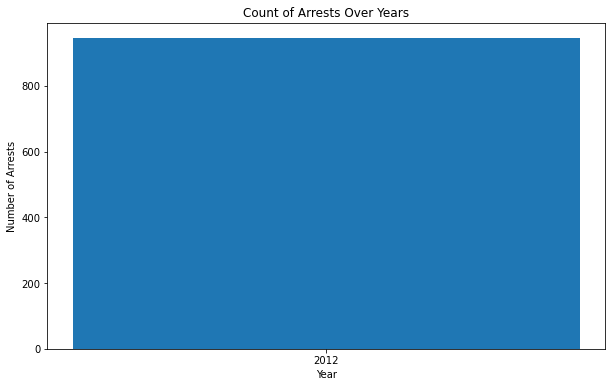

In [197]:
# Distribution of arrests over time
#df['DATETIME'] = pd.to_datetime(df['DATETIME'])
#df['YEAR'] = df['DATETIME'].dt.year
arrests_per_year = df['YEAR'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(arrests_per_year.index, arrests_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.title('Count of Arrests Over Years')
plt.xticks(arrests_per_year.index)
plt.show()

##--> The data set has only 2012 data

In [198]:
# Find duplicates based on key columns "TYPE","ADULT_JUVENILE","OFFENSE_DISTRICT", "YEAR","CCN", "AGE", "SEX", "RACE"
# create data set with duplicate values
duplicate_data = df[df.duplicated(subset=["TYPE","ADULT_JUVENILE","OFFENSE_DISTRICT", "YEAR","CCN", "AGE", "SEX", "RACE"])]
# Remove duplicate from the original data set
df = df[~df.duplicated(subset=["TYPE","ADULT_JUVENILE","OFFENSE_DISTRICT", "YEAR","CCN", "AGE", "SEX", "RACE"])]
df.shape
## --> Removed 16 duplicate rows

(929, 27)

In [199]:
# Fix casing or inconsistent values
# Convert all values in the 'Name' column to lowercase
#data['TYPE'] = data['Name'].str.lower()
# Capitalize the first letter of each value in the 'Name' column
df['TYPE'] = df['TYPE'].str.capitalize()
df['ADULT_JUVENILE'] = df['ADULT_JUVENILE'].str.capitalize()
# Capitalize the first letter of each word in the 'Name' column
df['ADDRESS'] = df['ADDRESS'].str.title()
df['ADDRESS'] = df['ADDRESS'].astype(str)
# Convert the 'Age' column to integer
df['AGE'] = df['AGE'].astype(int)
# Print the DataFrame with fixed casing
# Remove the 'GLOBALID' column
df.drop(columns='GLOBALID', inplace=True)
df.head(10)

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_X-COORDINATE,OFFENSE_Y-COORDINATE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ADDRESS,ARREST_X-COORDINATE,ARREST_Y-COORDINATE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID
0,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,b'\xea\x1d\xdf\xb3\xce\xc7\xcb',21,6D,603,403800.0,135500.0,708,7D,B,U,M,Narcotics,UCSA PWID MARIJUANA,2400 Block Of Elvans Rd Se,401200.0,131700.0,MARIJUANA_ARRESTS_94,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12574
1,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,b'\xa7+\x1ews\xb6M',18,6D,602,405900.0,137900.0,602,6D,B,N,M,Narcotics,UCSA PWID MARIJUANA,4900 Block Of Quarles St Ne,405900.0,137900.0,MARIJUANA_ARRESTS_95,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12575
2,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,b'o\xc6\x0c\xd3Y\t\xe8',28,6D,602,405900.0,136900.0,None,None,W,N,M,Narcotics,UCSA PWID MARIJUANA,800 Block Of 49Th St Ne,405900.0,136900.0,MARIJUANA_ARRESTS_96,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12576
3,Possession,Adult,2012,1970/01/01 00:22:06,b'\xf1t\xdd\xfe\x80\x01w',56,7D,705,400700.0,130700.0,101,1D,B,N,F,Narcotics,UCSA POSSESSION MARIJUANA,10Th / Alabama Ave Se,NaN,NaN,MARIJUANA_ARRESTS_97,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12577
4,Possession,Adult,2012,1970/01/01 00:22:06,b'\x8fR\xd8\xc0K\x1aO',30,5D,502,400400.0,139800.0,504,5D,B,U,M,Narcotics,UCSA POSSESSION MARIJUANA,2800 Block Of 7Th St Ne,NaN,NaN,MARIJUANA_ARRESTS_98,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12578
6,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,"b',#<\xef\xbc\x9c2'",25,5D,502,399700.0,138000.0,Out of State,Out of State,B,N,F,Narcotics,UCSA PWID MARIJUANA,1500 Block Of Eckington Pl Ne,399700.0,138000.0,MARIJUANA_ARRESTS_100,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12580
7,Possession,Adult,2012,1970/01/01 00:22:06,b'+h\xcd\xce\xf2\x92\x8f',29,2D,207,396400.0,137000.0,507,5D,B,N,M,Narcotics,UCSA POSSESSION MARIJUANA,1800 Block Of I St Ne,402000.0,137100.0,MARIJUANA_ARRESTS_101,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12581
8,Possession,Adult,2012,1970/01/01 00:22:06,b'\xbb\x82R\x03b>\xae',31,1D,108,401400.0,136700.0,505,5D,B,N,M,Narcotics,UCSA POSSESSION MARIJUANA,600 Block Of 14Th Pl Ne,401400.0,136700.0,MARIJUANA_ARRESTS_102,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12582
9,Possession,Adult,2012,1970/01/01 00:22:06,"b""\xaa\xbff\xf8'\x81\x11""",35,6D,602,406100.0,136000.0,None,None,U,U,M,Narcotics,UCSA POSSESSION MARIJUANA,50Th St Ne,406200.0,137300.0,MARIJUANA_ARRESTS_103,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12583
10,Possession with intent to distribute,Adult,2012,1970/01/01 00:22:06,b'\x8bw\x90\xe9\x92\xb6\xbc',29,6D,602,404800.0,136800.0,None,None,U,U,M,Narcotics,UCSA PWID MARIJUANA,4000 Block Of Grant St Ne,404800.0,136800.0,MARIJUANA_ARRESTS_104,JLAY,1970/01/01 00:27:46,JLAY,1970/01/01 00:27:46,12584


In [200]:
# Conduct Fuzzy Matching
## conduct Fuzzy search to find out the address with 'King Jr Avenue Sw'
# Target address to match
target_address = 'delaware ave sw'
# Calculate similarity scores for each address in the DataFrame
df['Similarity Score'] = df['ADDRESS'].apply(lambda x: fuzz.ratio(target_address.lower(), x.lower()))
# Find the best match and its similarity score
best_match = process.extractOne(target_address.lower(), df['ADDRESS'].apply(lambda x: x.lower()))
best_match_address = best_match[0]
best_match_score = best_match[1]
# Print the DataFrame and the best match
print("DataFrame:")
#print(data)
print("\nBest Match:")
print(f"Address: {best_match_address}")
print(f"Similarity Score: {best_match_score}")

DataFrame:

Best Match:
Address: 1300 block of delaware ave sw
Similarity Score: 90


#### Address: 1300 block of delaware ave sw has similarity score of 90

# Ethical implications
The above data dataset has been only used for study purpose and source is https://opendata.dc.gov/
* This data includes arrests made by the Metropolitan Police Department (MPD). The data represents individuals arrested with a marijuana charge, regardless of whether there was a more serious secondary charge.
* Race and ethnicity data are based on officer observation, which may or may not be accurate.
* Arrestee age is calculated based on the number of days between the self-reported or verified date of birth (DOB) of the arrestee and the date of the arrest. DOB data may not be accurate if selfreported or if the arrestee refused to provide it.
* This data may not match other marijuana data requests that may have included all law enforcement agencies in the district, or only the most serious charge.